### Importing Libraries
The following libraries are imported to support the development of the language prediction model:

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re
import pickle

### Loading and Exploring the Dataset
To load the language dataset into a Pandas DataFrame and examine the first 10 rows of the dataset:

In [86]:
data = pd.read_csv('newDataset.csv')

In [87]:
data.head(10)

,text,language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \r\nThe concept of nature as a whole, t...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


### Language Distribution
To show the distribution of languages in the dataset:

In [88]:
data["language"].value_counts()

language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

To prepare the data for training the language prediction model:

In [89]:
X = data["text"]
y = data["language"]

Encoding the language labels as numeric values:

In [90]:
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing 
Preprocessing the text data before training the Language Prediction Model:

In [91]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

### Bag of Words
* This is done to represent text data numerically
* This creates a matrix of word counts, where
    * each row represents a text sample
    * each column represents a unique word from the dataset

In [92]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [93]:
X.shape

(10337, 34937)

### Splitting the Dataset
The dataset is split into training and testing sets.<br>
The dataset is divided into **80% for training** and **20% for testing**

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model Training and Prediction

In [95]:
model = MultinomialNB() # Model Initialization
model.fit(x_train, y_train) # Model Training
y_pred = model.predict(x_test) # Prediction

### Model Evaluation

- Accuracy: {ac * 100}%

In [96]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy is :{}% ".format(ac * 100))

Accuracy is :97.87234042553192% 


- Classification Report: 

In [97]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       118
           1       0.99      0.95      0.97        77
           2       0.98      0.94      0.96        99
           3       0.91      1.00      0.95       280
           4       0.98      0.99      0.99       205
           5       1.00      0.99      0.99        94
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        17
           8       0.99      0.96      0.98       134
           9       1.00      0.98      0.99        58
          10       1.00      0.98      0.99       121
          11       0.97      0.99      0.98       146
          12       1.00      0.97      0.99       152
          13       0.97      0.99      0.98       185
          14       0.99      0.99      0.99       144
          15       1.00      0.98      0.99        85
          16       1.00      0.92      0.96        93

    accuracy              

- Confusion Matrix: 

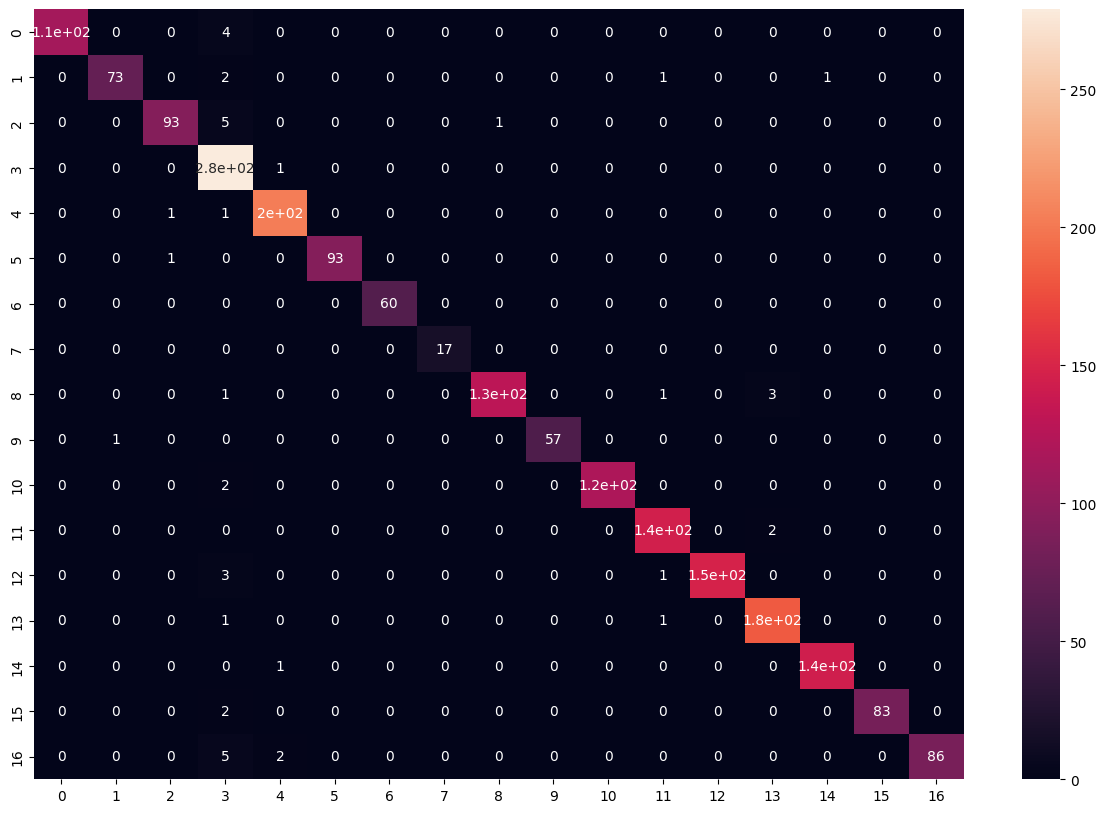

In [98]:
cm = confusion_matrix(y_test, y_pred)

# to visualize the Confusion Matrix:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving
- These saved files can be loaded later to reuse the trained models without retraining them from scratch

In [100]:
pickle.dump(cv, open("./model_files/transform.pkl", "wb"))
pickle.dump(model, open("./model_files/model.pkl", "wb"))
pickle.dump(le, open("./model_files/label_encoder.pkl", "wb"))
pickle.dump(ac, open("./model_files/model_accuracy.pkl", "wb"))